In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn  as sns


encoder=LabelEncoder()
data= pd.read_csv('data.csv')

# data
data.info()
# data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
print(data.duplicated().sum())
data=data.drop_duplicates()


0


In [18]:
print(data.isnull().sum())
# data=data.dropna()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
encoder=LabelEncoder()

cols = [
    'gender','Partner' ,'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'Churn'
]

for col in cols:
    data[col + '_num'] = encoder.fit_transform(data[col])
    # print( data[col + '_num'] )
    cols_lists= data[col + '_num'].tolist()
    print(cols_lists)


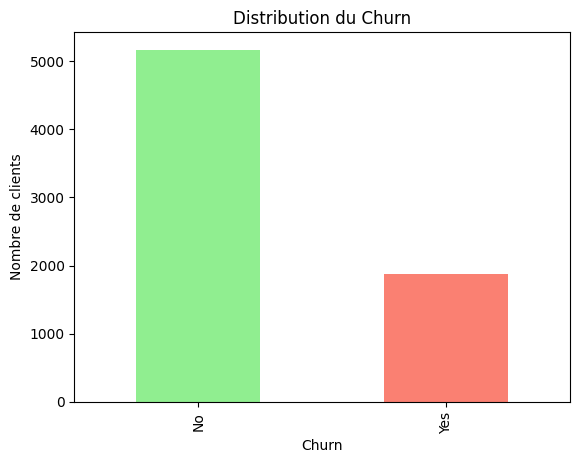

In [20]:
# visualisations
#Analyse univariée
churn_count=data['Churn'].value_counts()
churn_count.plot(kind='bar',color=['lightgreen','salmon'])
plt.title("Distribution du Churn")
plt.xlabel("Churn")
plt.ylabel("Nombre de clients")
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Copier le dataset si ce n'est pas déjà fait
 
encoder = LabelEncoder()

cols = [
    'gender','Partner' ,'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'Churn'
]

# Encoder les colonnes
for col in cols:
    data[col + '_num'] = encoder.fit_transform(data[col])
    data_cols=data[col + '_num'] 
    print(data_cols)


0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender_num, Length: 7043, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner_num, Length: 7043, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents_num, Length: 7043, dtype: int64
0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService_num, Length: 7043, dtype: int64
0       1
1       0
2       0
3       1
4       0
       ..
7038    2
7039    2
7040    1
7041    2
7042    0
Name: MultipleLines_num, Length: 7043, dtype: int64
0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService_num, Length: 7043, dtype: int64
0       0
1       2
2       2
3       2
4  

C:\Users\HP\AppData\Local\Temp\ipykernel_5940\3203779983.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x='Contract',hue='Churn',data=data,color='skyblue')


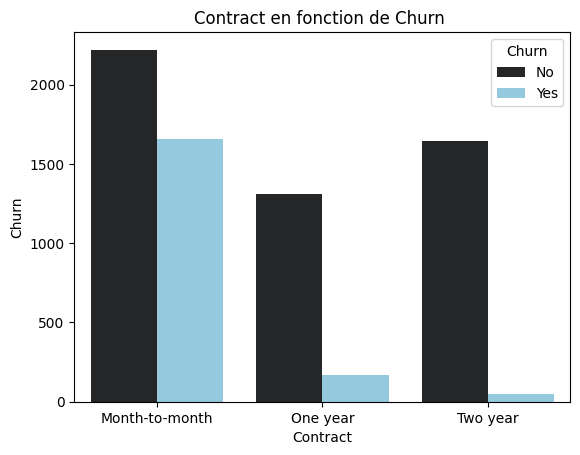

In [22]:
# countplot 
sns.countplot(x='Contract',hue='Churn',data=data,color='skyblue')

plt.title("Contract en fonction de Churn ")
plt.xlabel("Contract")
plt.ylabel("Churn")
plt.show()


In [23]:
data.to_csv("data_clean.csv", index=False)


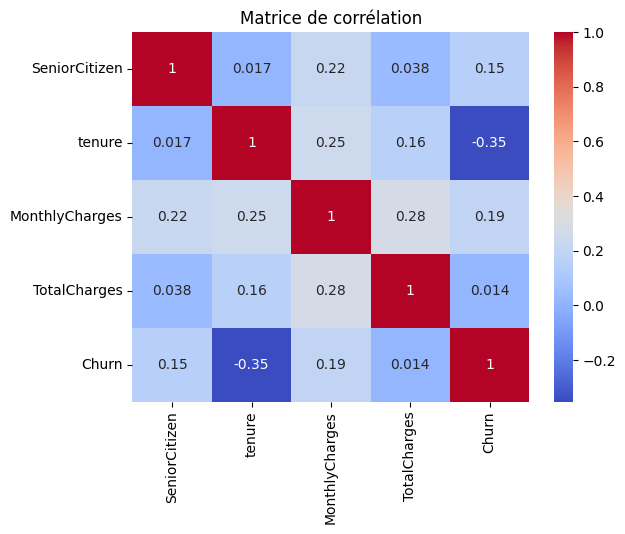

In [37]:
#corrilation
data['Churn'] = encoder.fit_transform(data["Churn"])
data['TotalCharges']=encoder.fit_transform(data["TotalCharges"])
col=data.select_dtypes(include=["int64","float64"])

sns.heatmap(col.corr(),annot=True,cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()
